**Set environment**

In [1]:
suppressWarnings(suppressMessages(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc 


## Helper function

In [2]:
binning = function(x, bw=0.1){
    p = seq(0, 1, by = bw)
    q = quantile(x, probs = p)
    q = unique(q)
    y = cut(x, breaks=q, include.lowest = TRUE)
    return(y)
}

bin2cat = function(x, bw=0.1){
    y = binning(x, bw=bw)
    y = paste0("Q", as.numeric(y))
    return(y)
}

## Import ccre and remap annotation

In [3]:
fdiry = file.path(FD_RES, "region", "KS91_K562_astarrseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.ccre_all.freq.tsv"
fpath = file.path(fdiry, fname)

dat_freq_ccre = read_tsv(fpath, show_col_types = FALSE)
head(dat_freq_ccre)

Peak,Chrom,Start,End,Len,Label,Count,Total,Freq
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chr1_100027983_100029702,chr1,100027983,100029702,1719,Low-DNase,1,1,1.0000000
chr1_100036871_100039191,chr1,100036871,100039191,2320,Low-DNase,2,6,0.3333333
chr1_100036871_100039191,chr1,100036871,100039191,2320,pELS,3,6,0.5000000
chr1_100036871_100039191,chr1,100036871,100039191,2320,PLS,1,6,0.1666667
chr1_100048234_100048985,chr1,100048234,100048985,751,Low-DNase,1,1,1.0000000
chr1_100049562_100050540,chr1,100049562,100050540,978,Low-DNase,1,1,1.0000000


In [4]:
fdiry = file.path(FD_RES, "region", "KS91_K562_astarrseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.remap2022_nr.tsv"
fpath = file.path(fdiry, fname)

dat_freq_remap = read_tsv(fpath, show_col_types = FALSE)
head(dat_freq_remap)

Peak,Chrom,Start,End,Len,Name,Count,Total,Freq
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chr1_100006256_100006880,chr1,100006256,100006880,624,TAF15:K-562,1,1,1.0000000
chr1_10002087_10003910,chr1,10002087,10003910,1823,CBX2:K-562,1,6,0.1666667
chr1_10002087_10003910,chr1,10002087,10003910,1823,CBX8:K-562,1,6,0.1666667
chr1_10002087_10003910,chr1,10002087,10003910,1823,"CEBPB:MCF-7,K-562,Hep-G2",1,6,0.1666667
chr1_10002087_10003910,chr1,10002087,10003910,1823,ETS1:K-562,1,6,0.1666667
chr1_10002087_10003910,chr1,10002087,10003910,1823,HINFP:K-562,1,6,0.1666667


## Plot annotation counts

**Length vs counts (v1)**

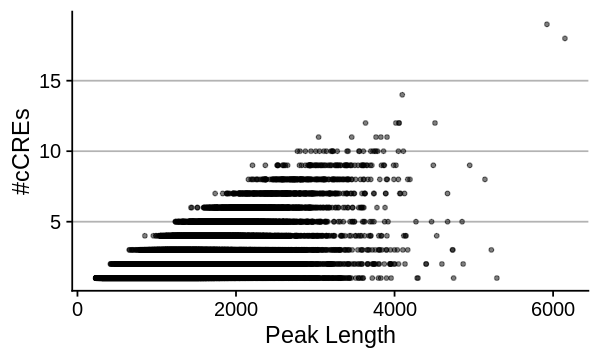

In [39]:
dat = dat_freq_ccre %>% dplyr::select(Peak, Len, Total) %>% distinct
gpt = ggplot(dat, aes(x=Len, y=Total)) + 
    geom_point(size=1, alpha=0.5) + 
    labs(x="Peak Length", y="#cCREs") +
    theme_cowplot() + 
    theme(panel.grid.major.y = element_line(
        color = "grey70",
        size = 0.5,
        linetype = 1))

options(repr.plot.height=3, repr.plot.width=5)
print(gpt)

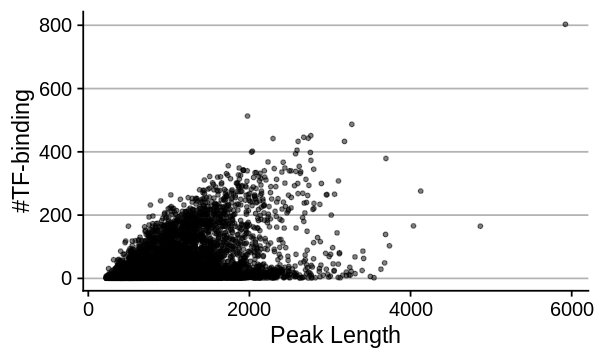

In [40]:
dat = dat_freq_remap %>% dplyr::select(Peak, Len, Total) %>% distinct
dat = dat %>% sample_n(10000)
gpt = ggplot(dat, aes(x=Len, y=Total)) + 
    geom_point(size=1, alpha=0.5) + 
    labs(x="Peak Length", y="#TF-binding") +
    theme_cowplot() + 
    theme(panel.grid.major.y = element_line(
        color = "grey70",
        size = 0.5,
        linetype = 1))

options(repr.plot.height=3, repr.plot.width=5)
print(gpt)

**Length vs counts (v2)**

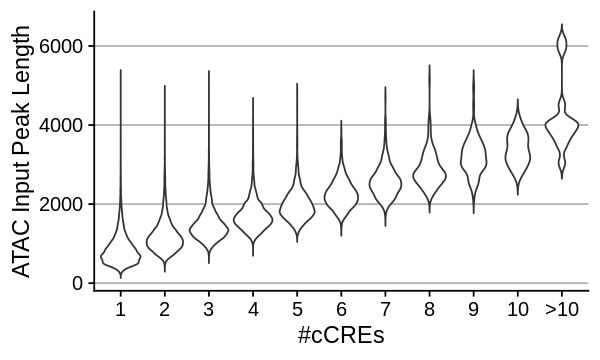

In [7]:
dat = dat_freq_ccre
dat = dat %>% dplyr::select(Peak, Len, Total) %>% distinct
dat = dat %>% mutate(Number = ifelse(Total > 10, ">10", Total))
dat$Number = factor(dat$Number, levels=c(as.character(1:10), ">10"))

gpt = ggplot(dat, aes(x=Number, y=Len)) + 
    geom_violin(trim=FALSE) + 
    labs(x="#cCREs", y="ATAC Input Peak Length") + 
    theme_cowplot() + 
    theme(panel.grid.major.y = element_line(
        color = "grey70",
        size = 0.5,
        linetype = 1))

options(repr.plot.height=3, repr.plot.width=5)
print(gpt)

In [8]:
dat = dat_freq_remap
dat = dat %>% dplyr::select(Peak, Len, Total) %>% distinct
x = dat$Total
p = seq(0, 1, by = 0.2)
q = quantile(x, probs = p)
print(q)
y = cut(x, breaks=q, include.lowest = TRUE)
head(y)

  0%  20%  40%  60%  80% 100% 
   1    2    4   13   47  884 


[1] [1,2]    (4,13]   (4,13]   (47,884] (13,47]  (13,47] 
Levels: [1,2] (2,4] (4,13] (13,47] (47,884]

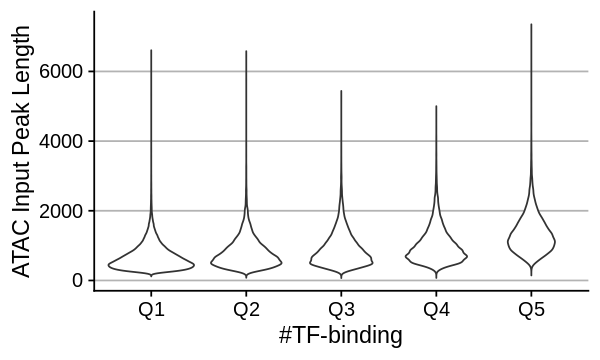

In [9]:
dat = dat_freq_remap
dat = dat %>% dplyr::select(Peak, Len, Total) %>% distinct
dat = dat %>% dplyr::mutate(Cat = bin2cat(Total, bw=0.2))
dat$Cat = factor(dat$Cat, levels=paste0("Q", 1:10))

gpt = ggplot(dat, aes(x=Cat, y=Len)) + 
    geom_violin(trim=FALSE) + 
    labs(x="#TF-binding", y="ATAC Input Peak Length") + 
    theme_cowplot() + 
    theme(panel.grid.major.y = element_line(
        color = "grey70",
        size = 0.5,
        linetype = 1))

options(repr.plot.height=3, repr.plot.width=5)
print(gpt)

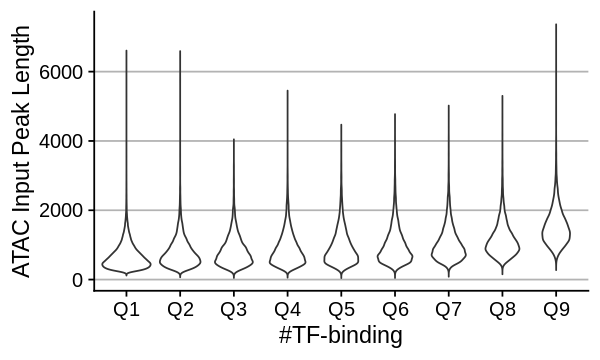

In [10]:
dat = dat_freq_remap
dat = dat %>% dplyr::select(Peak, Len, Total) %>% distinct
dat = dat %>% dplyr::mutate(Cat = bin2cat(Total, bw=0.1))
dat$Cat = factor(dat$Cat, levels=paste0("Q", 1:10))

gpt = ggplot(dat, aes(x=Cat, y=Len)) + 
    geom_violin(trim=FALSE) + 
    labs(x="#TF-binding", y="ATAC Input Peak Length") + 
    theme_cowplot() + 
    theme(panel.grid.major.y = element_line(
        color = "grey70",
        size = 0.5,
        linetype = 1))

options(repr.plot.height=3, repr.plot.width=5)
print(gpt)

In [12]:
head( dat_freq_remap)

Peak,Chrom,Start,End,Len,Name,Count,Total,Freq
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chr1_100006256_100006880,chr1,100006256,100006880,624,TAF15:K-562,1,1,1.0000000
chr1_10002087_10003910,chr1,10002087,10003910,1823,CBX2:K-562,1,6,0.1666667
chr1_10002087_10003910,chr1,10002087,10003910,1823,CBX8:K-562,1,6,0.1666667
chr1_10002087_10003910,chr1,10002087,10003910,1823,"CEBPB:MCF-7,K-562,Hep-G2",1,6,0.1666667
chr1_10002087_10003910,chr1,10002087,10003910,1823,ETS1:K-562,1,6,0.1666667
chr1_10002087_10003910,chr1,10002087,10003910,1823,HINFP:K-562,1,6,0.1666667


In [13]:
dat = dat_freq_remap
dat = dat %>% dplyr::select(Peak, Len, Total) %>% distinct
summary(dat$Total)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00    8.00   33.73   34.00  884.00 

In [ ]:
dat = dat_freq_remap
dat = dat %>% dplyr::select(Peak, Len, Total) %>% distinct
dat = dat %>% dplyr::mutate(Cat = bin2cat(Total, bw=0.2))
head(dat)

In [32]:
fun = function(x){
    q = c(1,2,3,4,5,6,7,8,9,10,50,100,150,200,300,400,900)
    y = cut(x, breaks=q, right = FALSE)
    return(y)
}

dat = dat_freq_remap
dat = dat %>% dplyr::select(Peak, Len, Total) %>% distinct
dat = dat %>% mutate(Number = fun(Total))
table(dat$Number)


    [1,2)     [2,3)     [3,4)     [4,5)     [5,6)     [6,7)     [7,8)     [8,9) 
    29367     16747     11450      8245      6426      5154      4406      3749 
   [9,10)   [10,50)  [50,100) [100,150) [150,200) [200,300) [300,400) [400,900) 
     3274     43091     13895      7015      5162      4512       934       228 

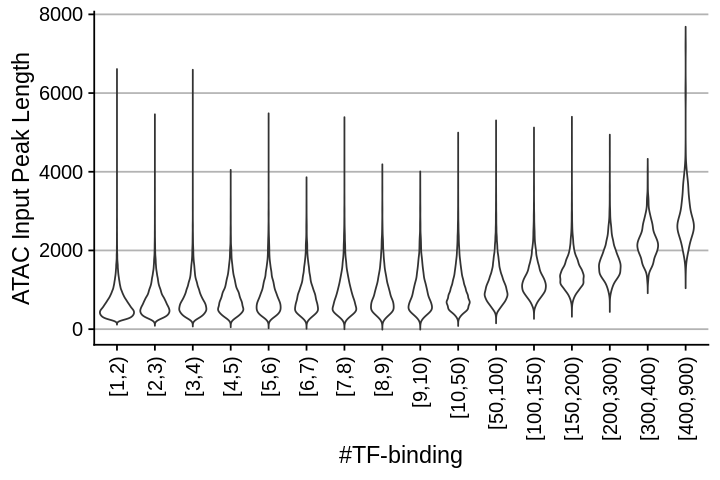

In [35]:
gpt = ggplot(dat, aes(x=Number, y=Len)) + 
    geom_violin(trim=FALSE) + 
    labs(x="#TF-binding", y="ATAC Input Peak Length") + 
    theme_cowplot() + 
    theme(axis.text.x = element_text(vjust=0.5, hjust=1, angle=90)) +
    theme(panel.grid.major.y = element_line(
        color = "grey70",
        size = 0.5,
        linetype = 1))

options(repr.plot.height=4, repr.plot.width=6)
print(gpt)

## Plot annotation heatmap

In [13]:
dat = dat_freq_ccre
head(dat)

Peak,Chrom,Start,End,Len,Label,Count,Total,Freq
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chr1_100027983_100029702,chr1,100027983,100029702,1719,Low-DNase,1,1,1.0000000
chr1_100036871_100039191,chr1,100036871,100039191,2320,Low-DNase,2,6,0.3333333
chr1_100036871_100039191,chr1,100036871,100039191,2320,pELS,3,6,0.5000000
chr1_100036871_100039191,chr1,100036871,100039191,2320,PLS,1,6,0.1666667
chr1_100048234_100048985,chr1,100048234,100048985,751,Low-DNase,1,1,1.0000000
chr1_100049562_100050540,chr1,100049562,100050540,978,Low-DNase,1,1,1.0000000


In [14]:
LOC_GATA1 = c( 47786500,  49786650)
LOC_MYC   = c(126735970, 128736170)

dat = dat_freq_ccre
dat_freq_ccre_gata1 = dat %>% dplyr::filter(Chrom == "chrX", Start >= LOC_GATA1[1], End <= LOC_GATA1[2])
dat_freq_ccre_myc   = dat %>% dplyr::filter(Chrom == "chr8", Start >= LOC_MYC[1],   End <= LOC_MYC[2])

dat = dat_freq_remap
dat_freq_remap_gata1 = dat %>% dplyr::filter(Chrom == "chrX", Start >= LOC_GATA1[1], End <= LOC_GATA1[2])
dat_freq_remap_myc   = dat %>% dplyr::filter(Chrom == "chr8", Start >= LOC_MYC[1],   End <= LOC_MYC[2])

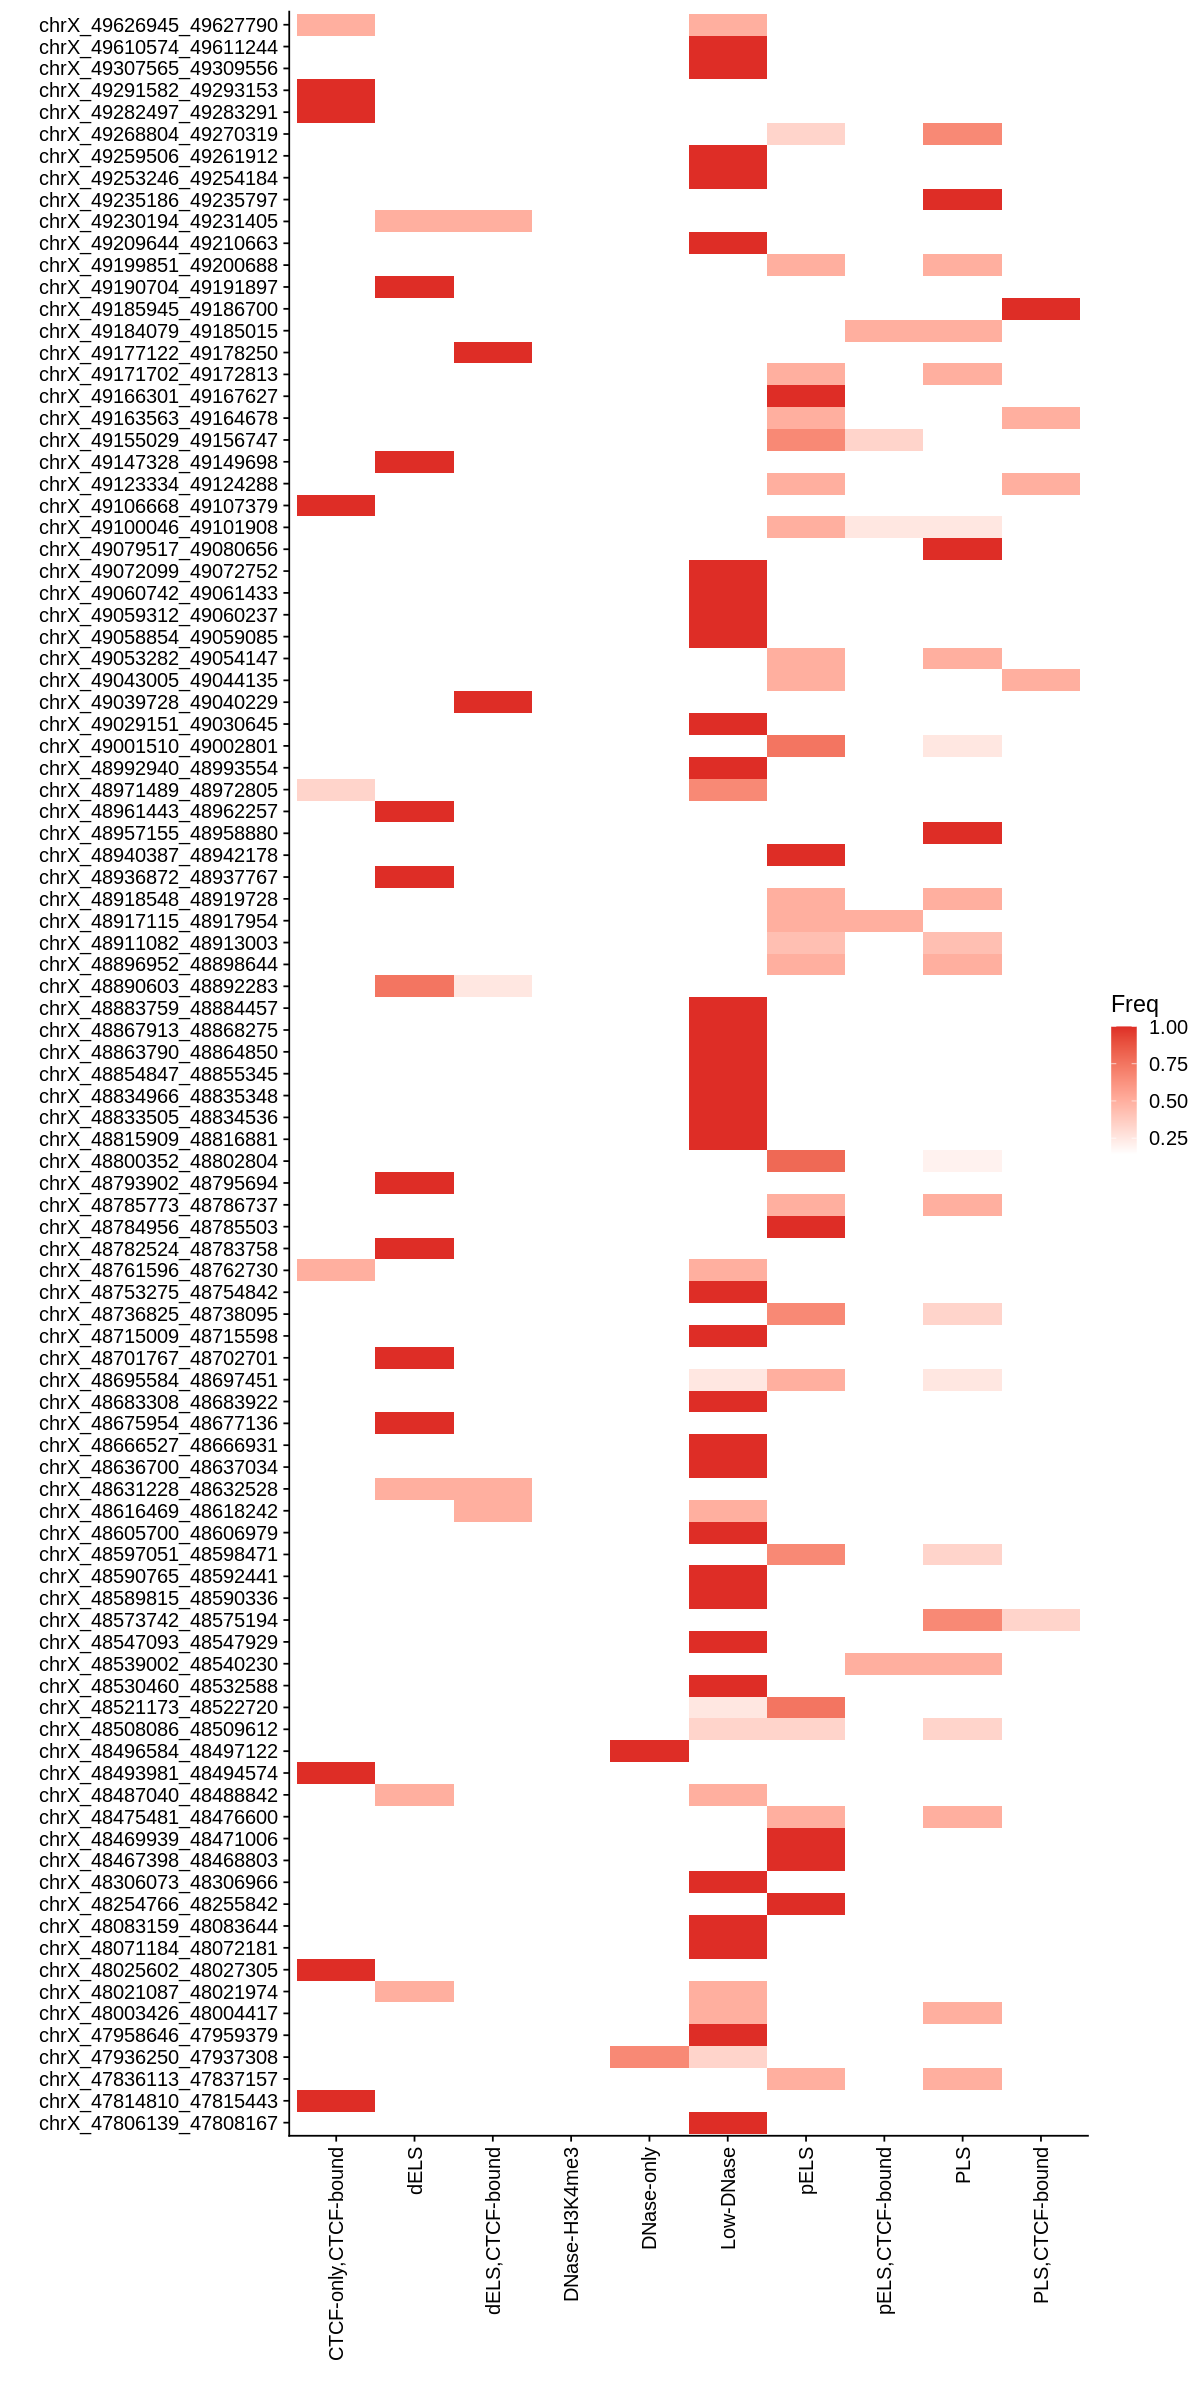

In [15]:
dat = dat_freq_ccre_gata1 %>% dplyr::select(Peak, Label, Freq)

gpt = ggplot(dat, aes(x=Label, y=Peak, fill=Freq)) + 
    geom_tile() + 
    theme_cowplot() + 
    theme(axis.text.x = element_text(vjust=0.5, hjust=1, angle=90)) +
    scale_fill_gradient(low = "white", high = "#de2d26") +
    labs(x="", y="")

options(repr.plot.height=20, repr.plot.width=10)
print(gpt)

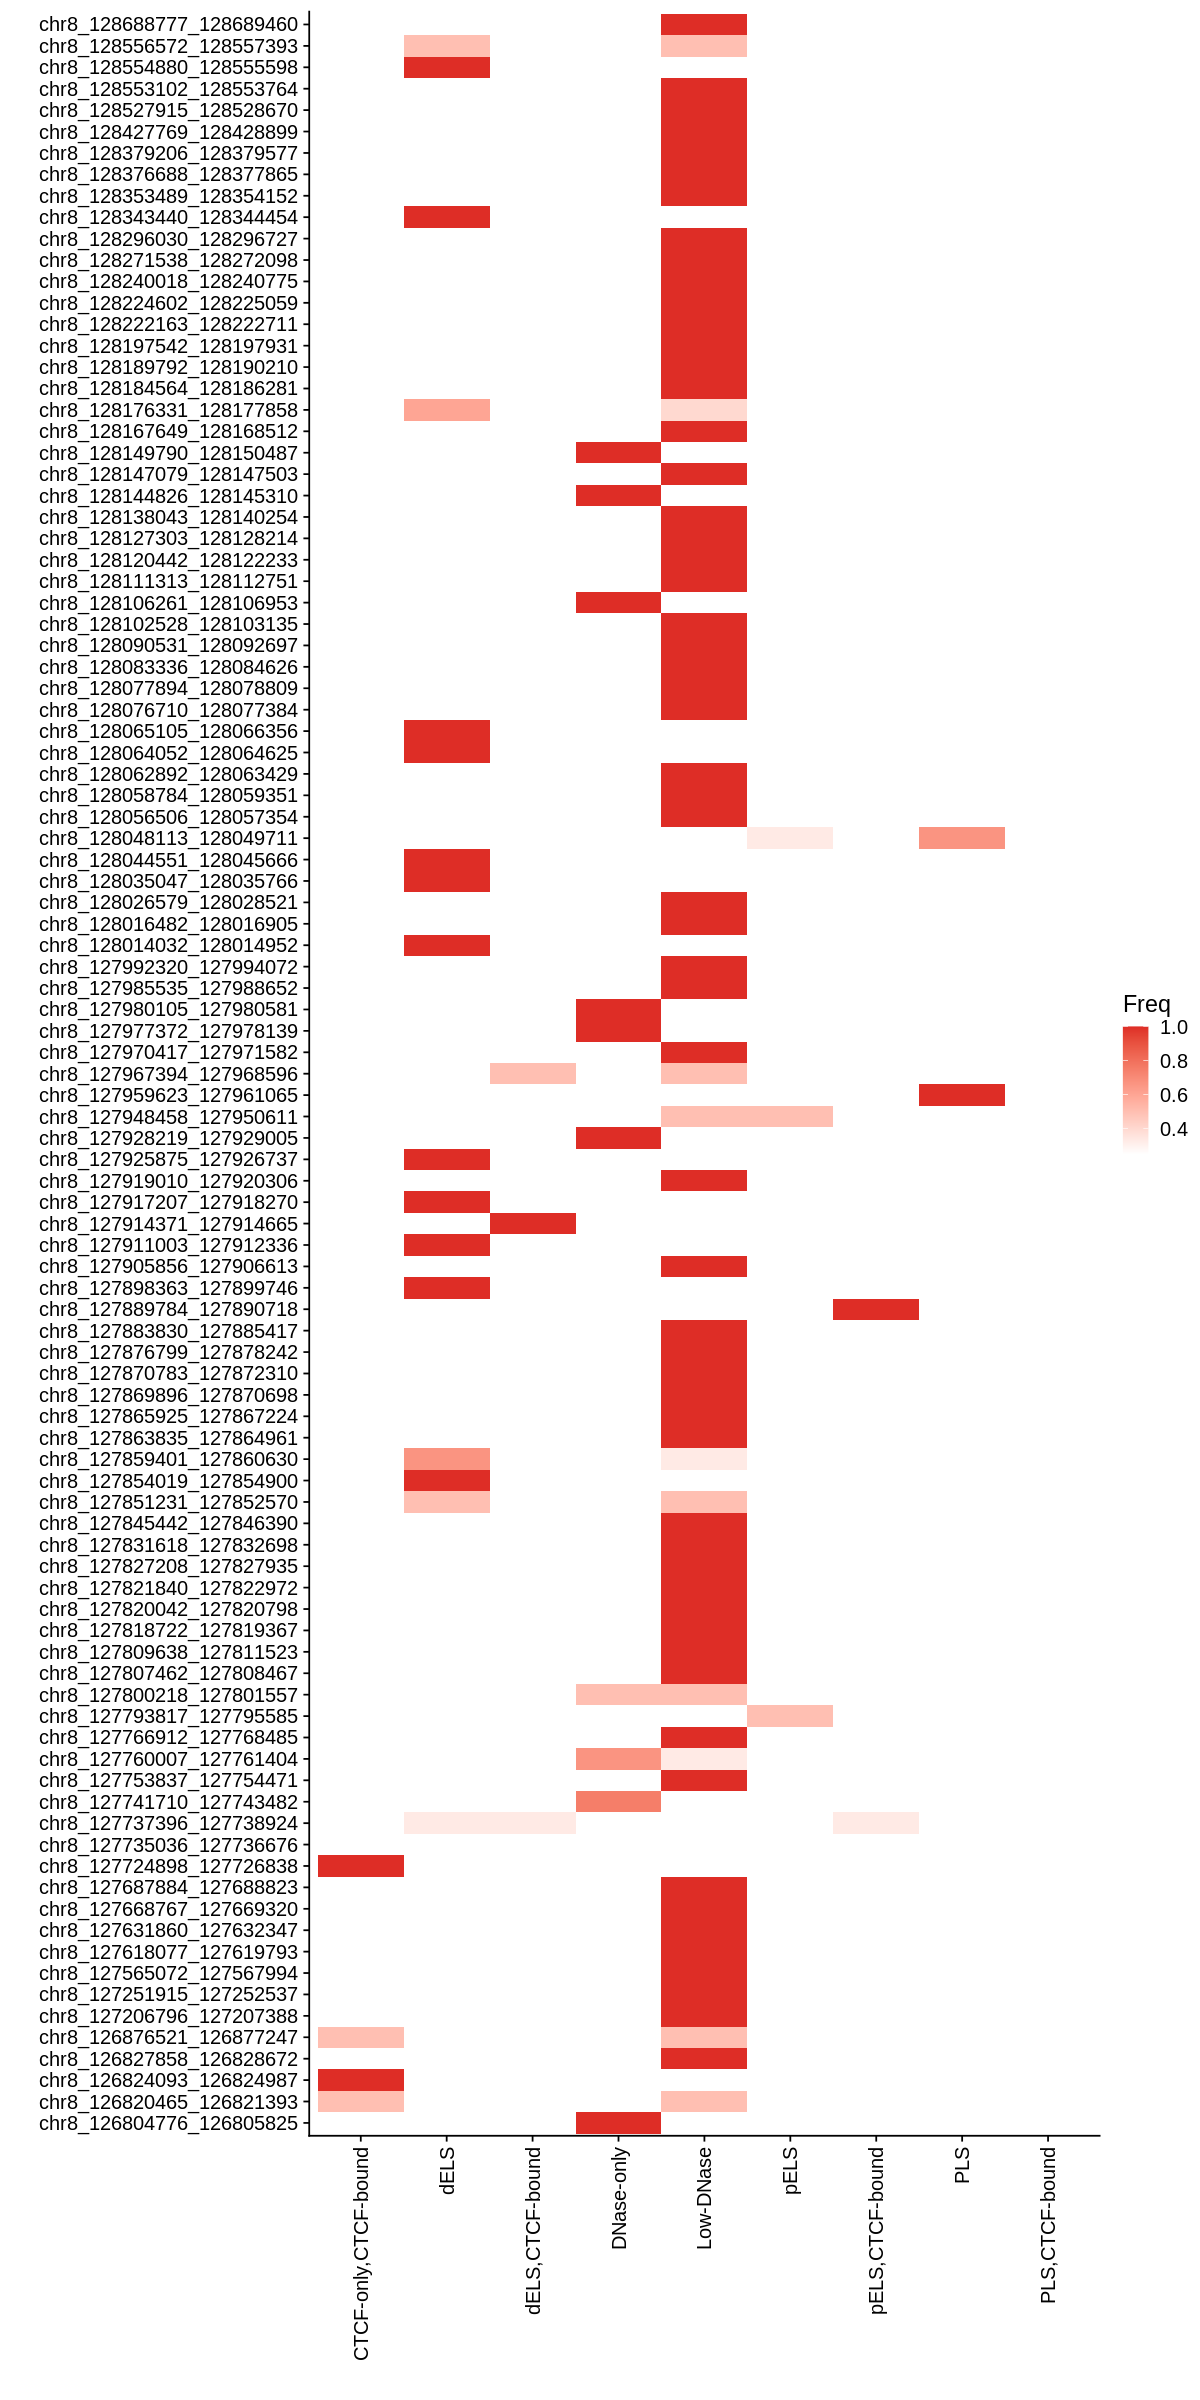

In [16]:
dat = dat_freq_ccre_myc %>% dplyr::select(Peak, Label, Freq)

gpt = ggplot(dat, aes(x=Label, y=Peak, fill=Freq)) + 
    geom_tile() + 
    theme_cowplot() + 
    theme(axis.text.x = element_text(vjust=0.5, hjust=1, angle=90)) +
    scale_fill_gradient(low = "white", high = "#de2d26") +
    labs(x="", y="")

options(repr.plot.height=20, repr.plot.width=10)
print(gpt)

In [19]:
dat_freq_remap_gata1 %>% head

Peak,Chrom,Start,End,Len,Name,Count,Total,Freq
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chrX_47796208_47796828,chrX,47796208,47796828,620,ATF7:K-562,1,54,0.01851852
chrX_47796208_47796828,chrX,47796208,47796828,620,BRD2:K-562,1,54,0.01851852
chrX_47796208_47796828,chrX,47796208,47796828,620,BRD3:K-562,1,54,0.01851852
chrX_47796208_47796828,chrX,47796208,47796828,620,"BRD4:K-562,SUM159PT",1,54,0.01851852
chrX_47796208_47796828,chrX,47796208,47796828,620,CCNT2:K-562,1,54,0.01851852
chrX_47796208_47796828,chrX,47796208,47796828,620,CEBPB:K-562,1,54,0.01851852


In [21]:
dat = dat_freq_remap_gata1
head(dat)

Peak,Chrom,Start,End,Len,Name,Count,Total,Freq
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chrX_47796208_47796828,chrX,47796208,47796828,620,ATF7:K-562,1,54,0.01851852
chrX_47796208_47796828,chrX,47796208,47796828,620,BRD2:K-562,1,54,0.01851852
chrX_47796208_47796828,chrX,47796208,47796828,620,BRD3:K-562,1,54,0.01851852
chrX_47796208_47796828,chrX,47796208,47796828,620,"BRD4:K-562,SUM159PT",1,54,0.01851852
chrX_47796208_47796828,chrX,47796208,47796828,620,CCNT2:K-562,1,54,0.01851852
chrX_47796208_47796828,chrX,47796208,47796828,620,CEBPB:K-562,1,54,0.01851852


In [22]:
dat = dat_freq_remap_gata1 %>% dplyr::select(Peak, Name, Freq)
head(dat)

Peak,Name,Freq
<chr>,<chr>,<dbl>
chrX_47796208_47796828,ATF7:K-562,0.01851852
chrX_47796208_47796828,BRD2:K-562,0.01851852
chrX_47796208_47796828,BRD3:K-562,0.01851852
chrX_47796208_47796828,"BRD4:K-562,SUM159PT",0.01851852
chrX_47796208_47796828,CCNT2:K-562,0.01851852
chrX_47796208_47796828,CEBPB:K-562,0.01851852


In [29]:
dat = dat_freq_remap_gata1
dat = dat %>% group_by(Name) %>% 
    summarize(Total = sum(Count)) %>% 
    slice_max(order_by = Total, n = 50)
mtf = dat$Name
mtf

[1] "GFI1B:K-562"   "XRCC5:K-562"   "ZKSCAN1:K-562" "E2F6:K-562"   
 [5] "BRD3:K-562"    "HDAC2:K-562"   "CREM:K-562"    "MTA3:K-562"   
 [9] "CTBP1:K-562"   "SMARCE1:K-562" "ILF3:K-562"    "NCOR1:K-562"  
[13] "HDAC1:K-562"   "NR2F2:K-562"   "HDGF:K-562"    "TARDBP:K-562" 
[17] "NCOA1:K-562"   "ZBTB7A:K-562"  "ARID1B:K-562"  "L3MBTL2:K-562"
[21] "MYNN:K-562"    "ZFP36:K-562"   "GABPB1:K-562"  "NEUROD1:K-562"
[25] "PML:K-562"     "RBFOX2:K-562"  "PLAG1:K-562"   "VEZF1:K-562"  
[29] "MEIS2:K-562"   "SMAD5:K-562"   "EP400:K-562"   "ZNF639:K-562" 
[33] "AFF1:K-562"    "CCNT2:K-562"   "HMGN3:K-562"   "KDM4B:K-562"  
[37] "TBL1XR1:K-562" "ZNF3:K-562"    "NFE2L2:K-562"  "RBM22:K-562"  
[41] "REST:K-562"    "BRD2:K-562"    "E2F4:K-562"    "MBD2:K-562"   
[45] "SOX6:K-562"    "ZBTB2:K-562"   "ZNF24:K-562"   "CEBPD:K-562"  
[49] "E4F1:K-562"    "IRF1:K-562"    "TRIM28:K-562"

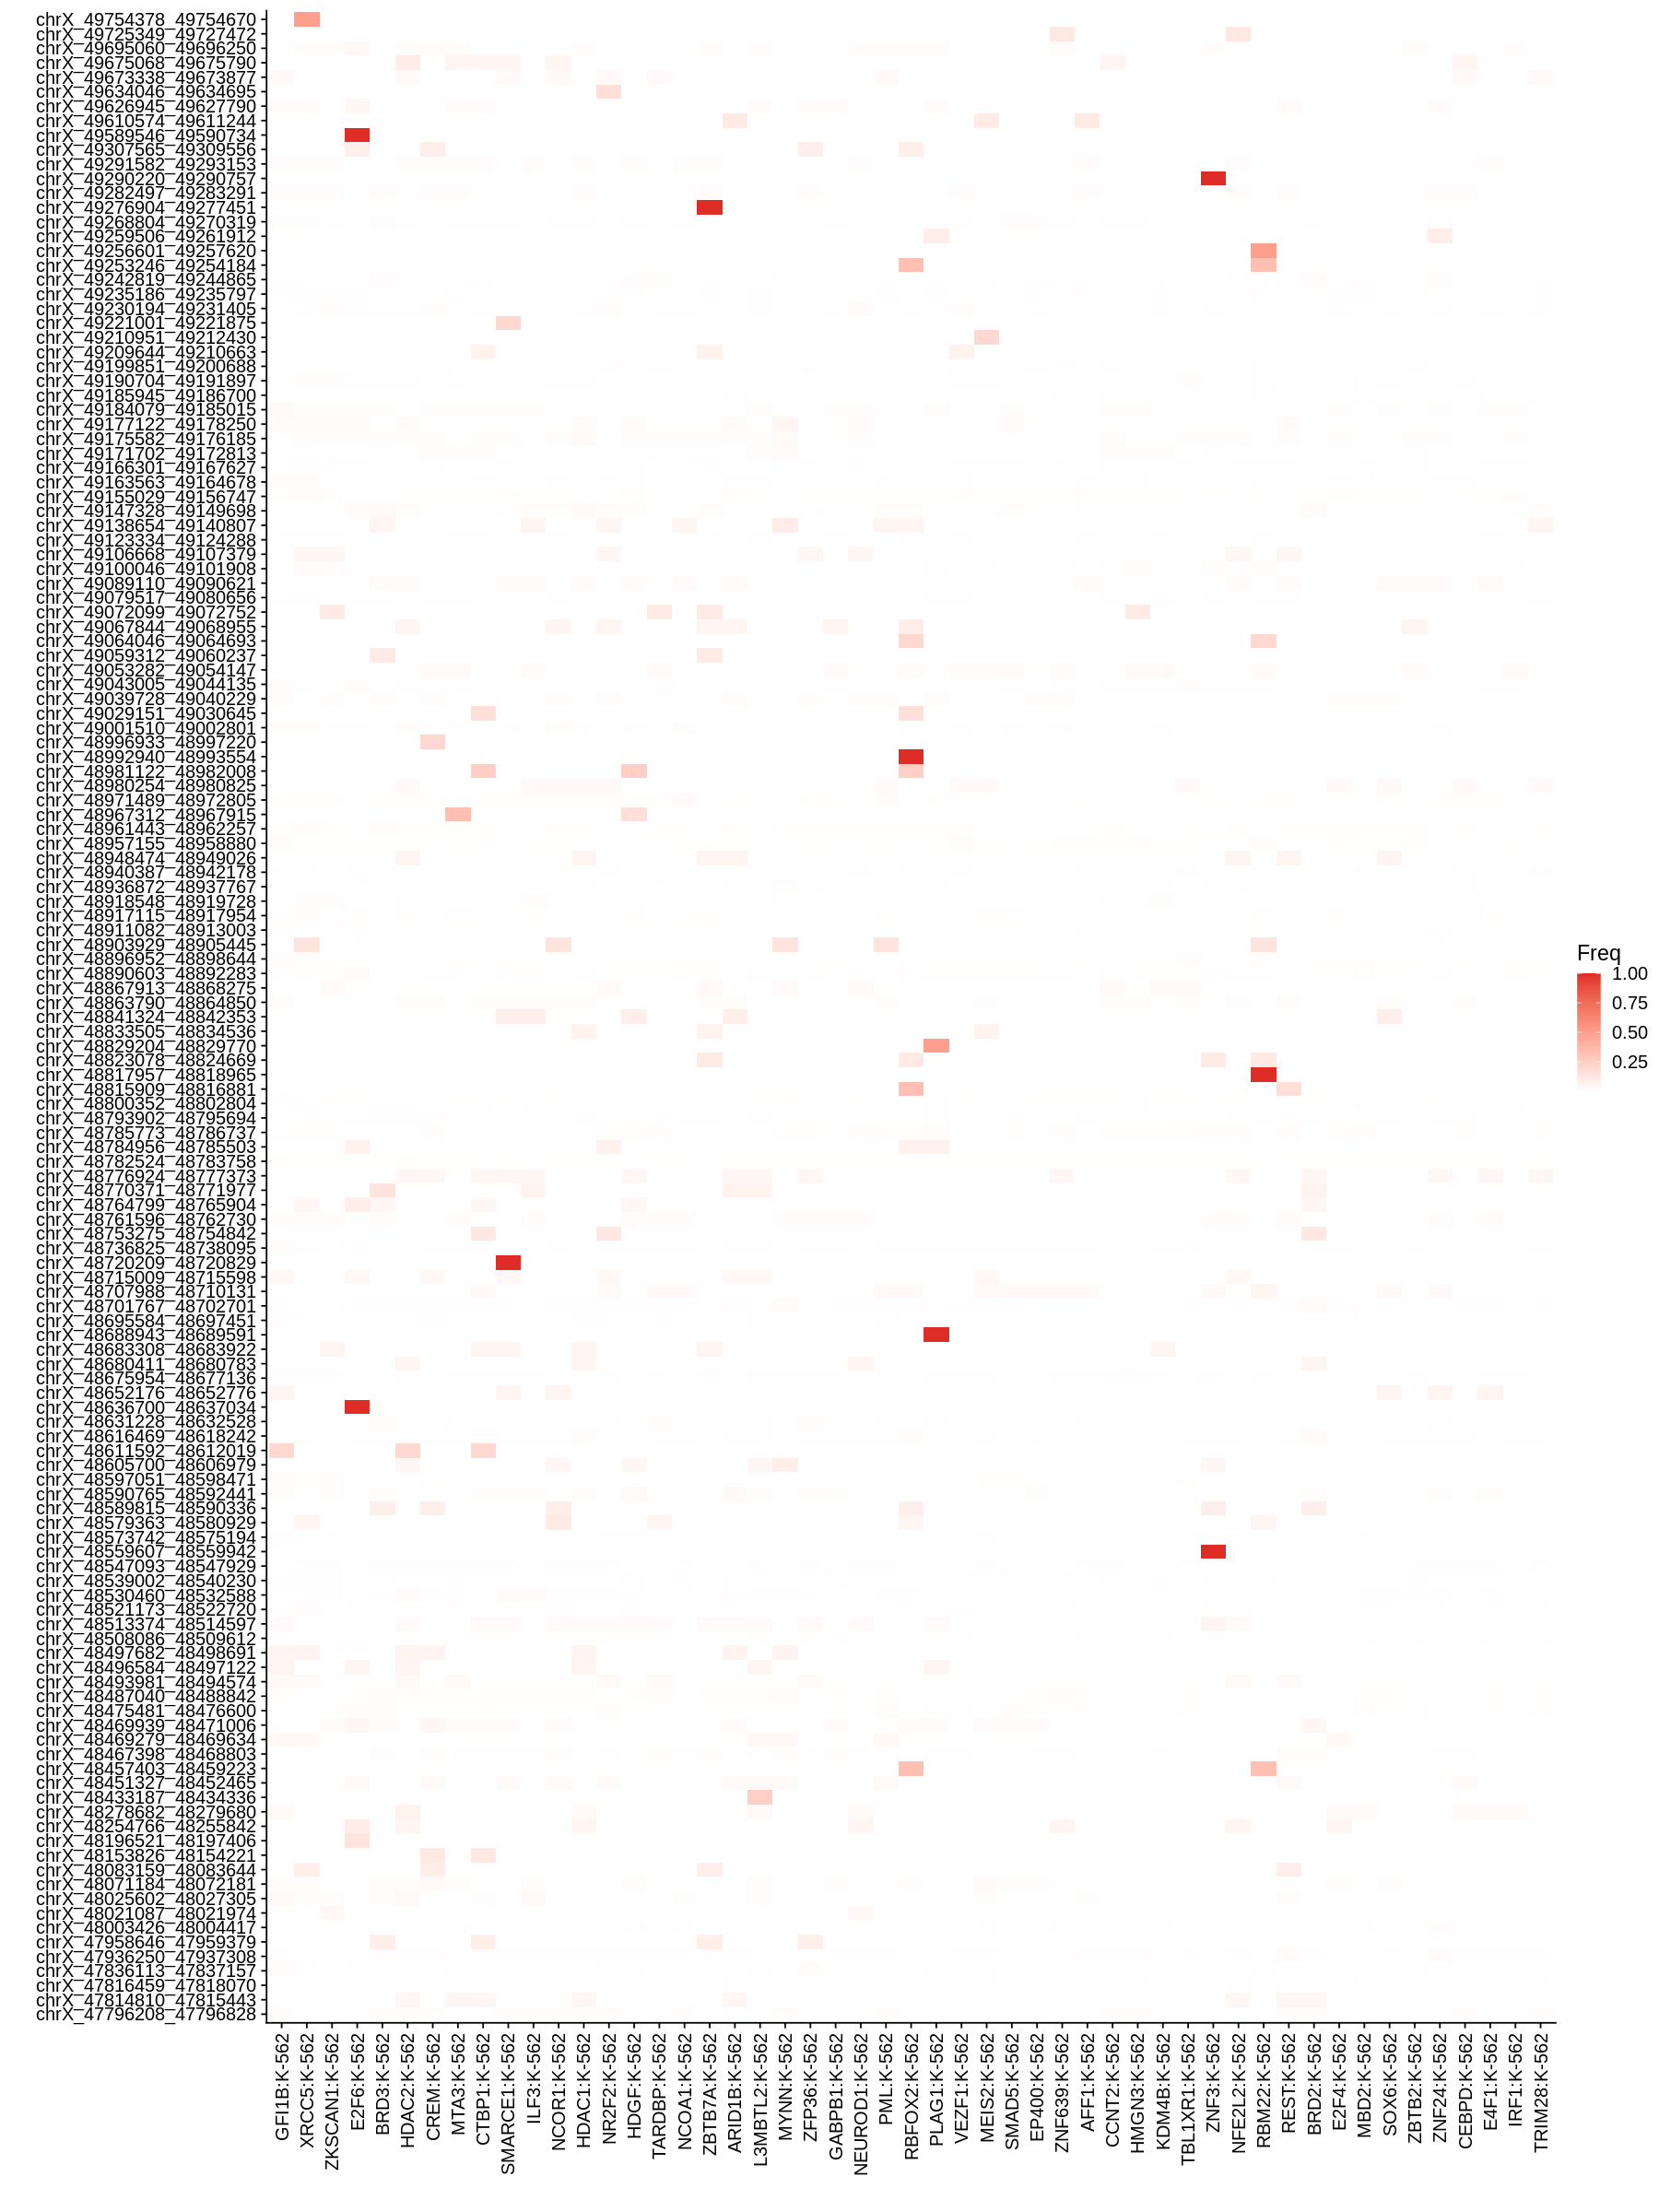

In [31]:
dat = dat_freq_remap_gata1 %>% 
    dplyr::select(Peak, Name, Freq) %>%
    dplyr::filter(Name %in% mtf)

dat$Name = factor(dat$Name, levels=mtf)

gpt = ggplot(dat, aes(x=Name, y=Peak, fill=Freq)) + 
    geom_tile() + 
    theme_cowplot() + 
    scale_fill_gradient(low = "white", high = "#de2d26") +
    theme(axis.text.x = element_text(vjust=0.5, hjust=1, angle=90)) +
    labs(x="", y="")

options(repr.plot.height=20, repr.plot.width=15)
print(gpt)

In [43]:
mtf = dat_freq_remap_gata1$Name
idx = str_detect(mtf, "K-562")
mtf = mtf[idx]
print(length(mtf))
head(mtf)

[1] 9328


[1] "ATF7:K-562"          "BRD2:K-562"          "BRD3:K-562"         
[4] "BRD4:K-562,SUM159PT" "CCNT2:K-562"         "CEBPB:K-562"

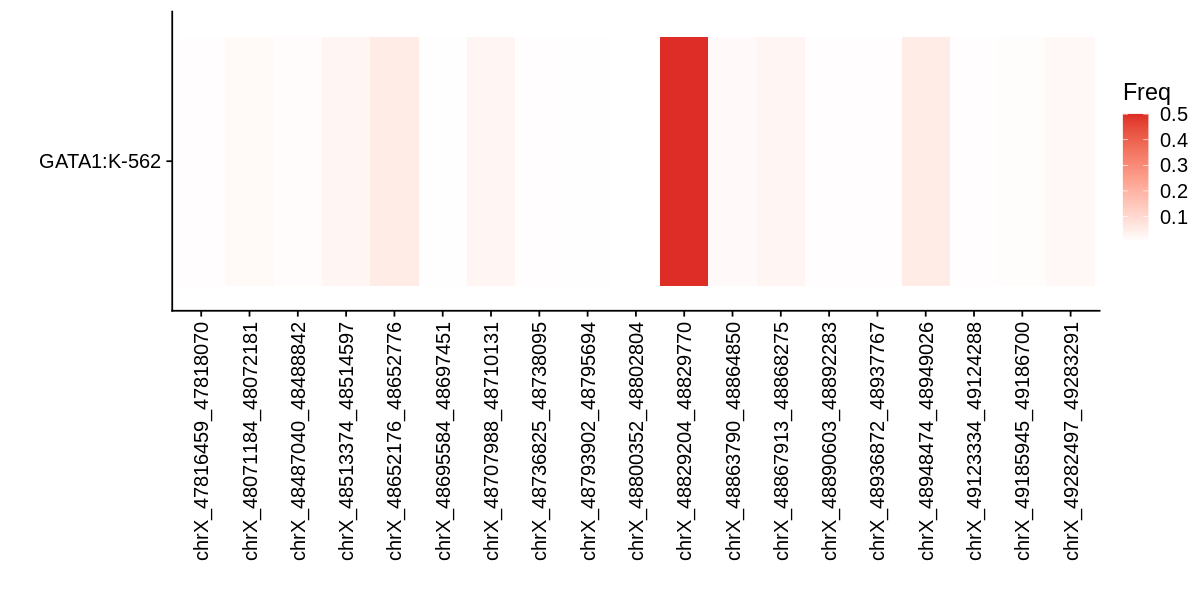

In [59]:
dat = dat_freq_remap_gata1 %>% 
    dplyr::select(Peak, Name, Freq) %>%
    dplyr::filter(Name %in% c("GATA1:K-562"))


gpt = ggplot(dat, aes(x=Peak, y=Name, fill=Freq)) + 
    geom_tile() + 
    theme_cowplot() + 
    scale_fill_gradient(low = "white", high = "#de2d26") +
    theme(axis.text.x = element_text(vjust=0.5, hjust=1, angle=90)) +
    labs(x="", y="")

options(repr.plot.height=5, repr.plot.width=10)
print(gpt)

In [5]:
library(Rtsne)

ERROR: Error in library(Rtsne): there is no package called ‘Rtsne’
